In [4]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [20]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [21]:
y.shape, tx.shape

((202,), (202, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [22]:
def compute_error_vector(y,tx,w):
    return y -np.dot(tx,w)


def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    # ***************************************************
    e = y - np.dot(tx,w)
    return (1/2)*np.mean(e**2)

compute_loss(y,tx,w)

442.3566317234336

# 2 Grid Search

Fill in the function `grid_search()` below:

In [23]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
    for i in range(len(w0)):
        for j in range(len(w1)):
            losses[i,j] = compute_loss(y,tx,np.array([w0[i],w1[j]]))
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=66.17528250670827, w0*=73.57859531772576, w1*=10.535117056856194, execution time=1.098 seconds


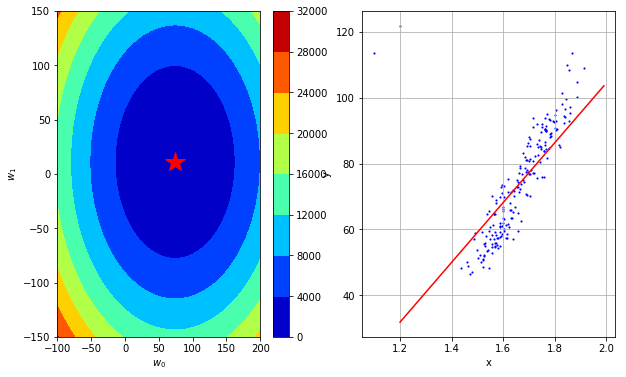

In [24]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=300)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [10]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    e = compute_error_vector(y,tx,w)
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and loss
    # ***************************************************
    return (-1/len(y))*tx.T.dot(e)
w = np.array([100,20])
w1 = np.array([50,10])
print(compute_gradient(y,tx,w))
print(compute_gradient(y,tx,w1))

[26.36772754  5.52429512]
[-23.63227246  -4.47570488]


Please fill in the functions `gradient_descent` below:

In [11]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        loss = compute_loss(y,tx,w)
        gradient = compute_gradient(y,tx,w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w -gamma*gradient
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [12]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2829.2722244384163, w0=7.3632272459731105, w1=1.4475704876437263
Gradient Descent(1/49): loss=2294.302754409306, w0=13.990131767348917, w1=2.750383926523079
Gradient Descent(2/49): loss=1860.9774836857268, w0=19.95434583658714, w1=3.922916021514496
Gradient Descent(3/49): loss=1509.9840143996275, w0=25.32213849890154, w1=4.978194907006768
Gradient Descent(4/49): loss=1225.6793042778875, w0=30.153151894984507, w1=5.927945903949812
Gradient Descent(5/49): loss=995.3924890792775, w0=34.50106395145917, w1=6.7827218011985515
Gradient Descent(6/49): loss=808.8601687684038, w0=38.41418480228637, w1=7.552020108722415
Gradient Descent(7/49): loss=657.7689893165962, w0=41.935993568030845, w1=8.244388585493892
Gradient Descent(8/49): loss=535.3851339606322, w0=45.105621457200876, w1=8.86752021458822
Gradient Descent(9/49): loss=436.25421112230123, w0=47.9582865574539, w1=9.428338680773114
Gradient Descent(10/49): loss=355.9581636232532, w0=50.52568514768163, w1=9.9330

In [13]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4 Stochastic gradient descent

In [14]:
for minibatchy, minibatchx in batch_iter(y,tx,2):
    print(minibatchy)
    print(minibatchx)

[54.42553893 71.28563111]
[[ 1.         -0.80574606]
 [ 1.         -0.45318235]]


In [15]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.It's same as the gradient descent.
    # ***************************************************
    e = compute_error_vector(y,tx,w)
    return - tx.T.dot(e)/len(e)

def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    # ***************************************************
    w = initial_w
    ws = [initial_w]
    losses = []
    for n_iter in range(max_iters):
        for y_batch, tx_batch in batch_iter(y,tx,batch_size=batch_size,num_batches=1):
            grad = compute_stoch_gradient(y_batch,tx_batch,w)
            w = w - gamma * grad
            loss = compute_loss(y,tx,w)
            ws.append(w)
            losses.append(loss)
        print("SGD({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [19]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.4
batch_size = 8

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD(0/49): loss=1227.0859149008675, w0=28.755486457879755, w1=-5.845688735289522
SGD(1/49): loss=563.8524990937821, w0=46.44010729421022, w1=-4.524407812058954
SGD(2/49): loss=175.84615689127887, w0=59.16932539201689, w1=3.741246050953241
SGD(3/49): loss=53.03123350985905, w0=66.01876037983902, w1=9.913903564892514
SGD(4/49): loss=32.0871389184462, w0=67.91615237917483, w1=12.423053069990543
SGD(5/49): loss=16.799255239864948, w0=71.12511706868773, w1=14.315041558138624
SGD(6/49): loss=15.6276809430051, w0=72.83034510706952, w1=16.29927411943777
SGD(7/49): loss=16.93180339830674, w0=72.57094803167642, w1=16.81029855242925
SGD(8/49): loss=18.69619312912334, w0=72.48501382095417, w1=17.440382641549693
SGD(9/49): loss=18.14424774463144, w0=71.01709267729895, w1=15.94623558736279
SGD(10/49): loss=17.280267246251096, w0=71.82970445130525, w1=16.481798953108598
SGD(11/49): loss=18.3830400246415, w0=71.28173831189055, w1=16.464221822825316
SGD(12/49): loss=14.885497681039308, w0=72.3104598487

In [17]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)